# SVM을 사용하여 타이타닉 생존자 (1), 사망자 (0) 예측하는 이진분류 모델로 정의

## 기본 라이브러리 import

In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 43.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

## 데이터 준비하기

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 데이터 분석하기

#### 생존자와 사망자 비율 확인

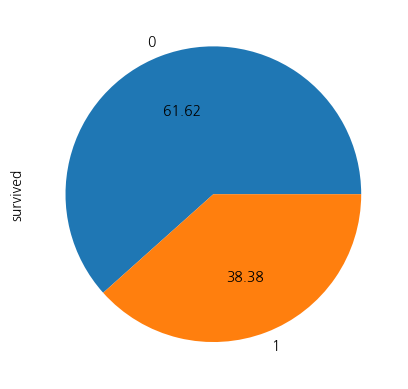

In [ ]:
# 사망자(0) : 549 , 생존자(1) : 342 -> 비율 확인 -> pie 차트
df['survived'].value_counts().plot.pie(autopct='%.2f'); # 불균형한 데이터셋 -> 비율을 생각하여 데이터 분석하기

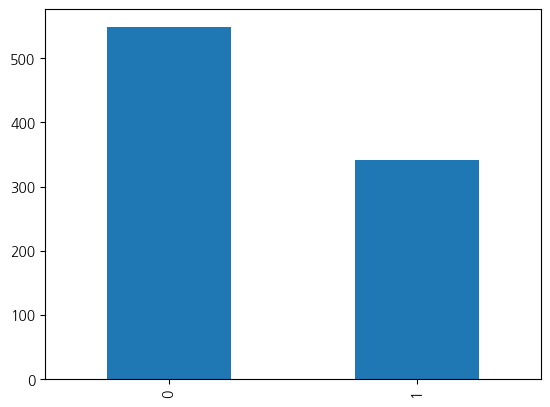

In [ ]:
df['survived'].value_counts().plot.bar();

#### 생존과 사망과 관계있는 feature 분석

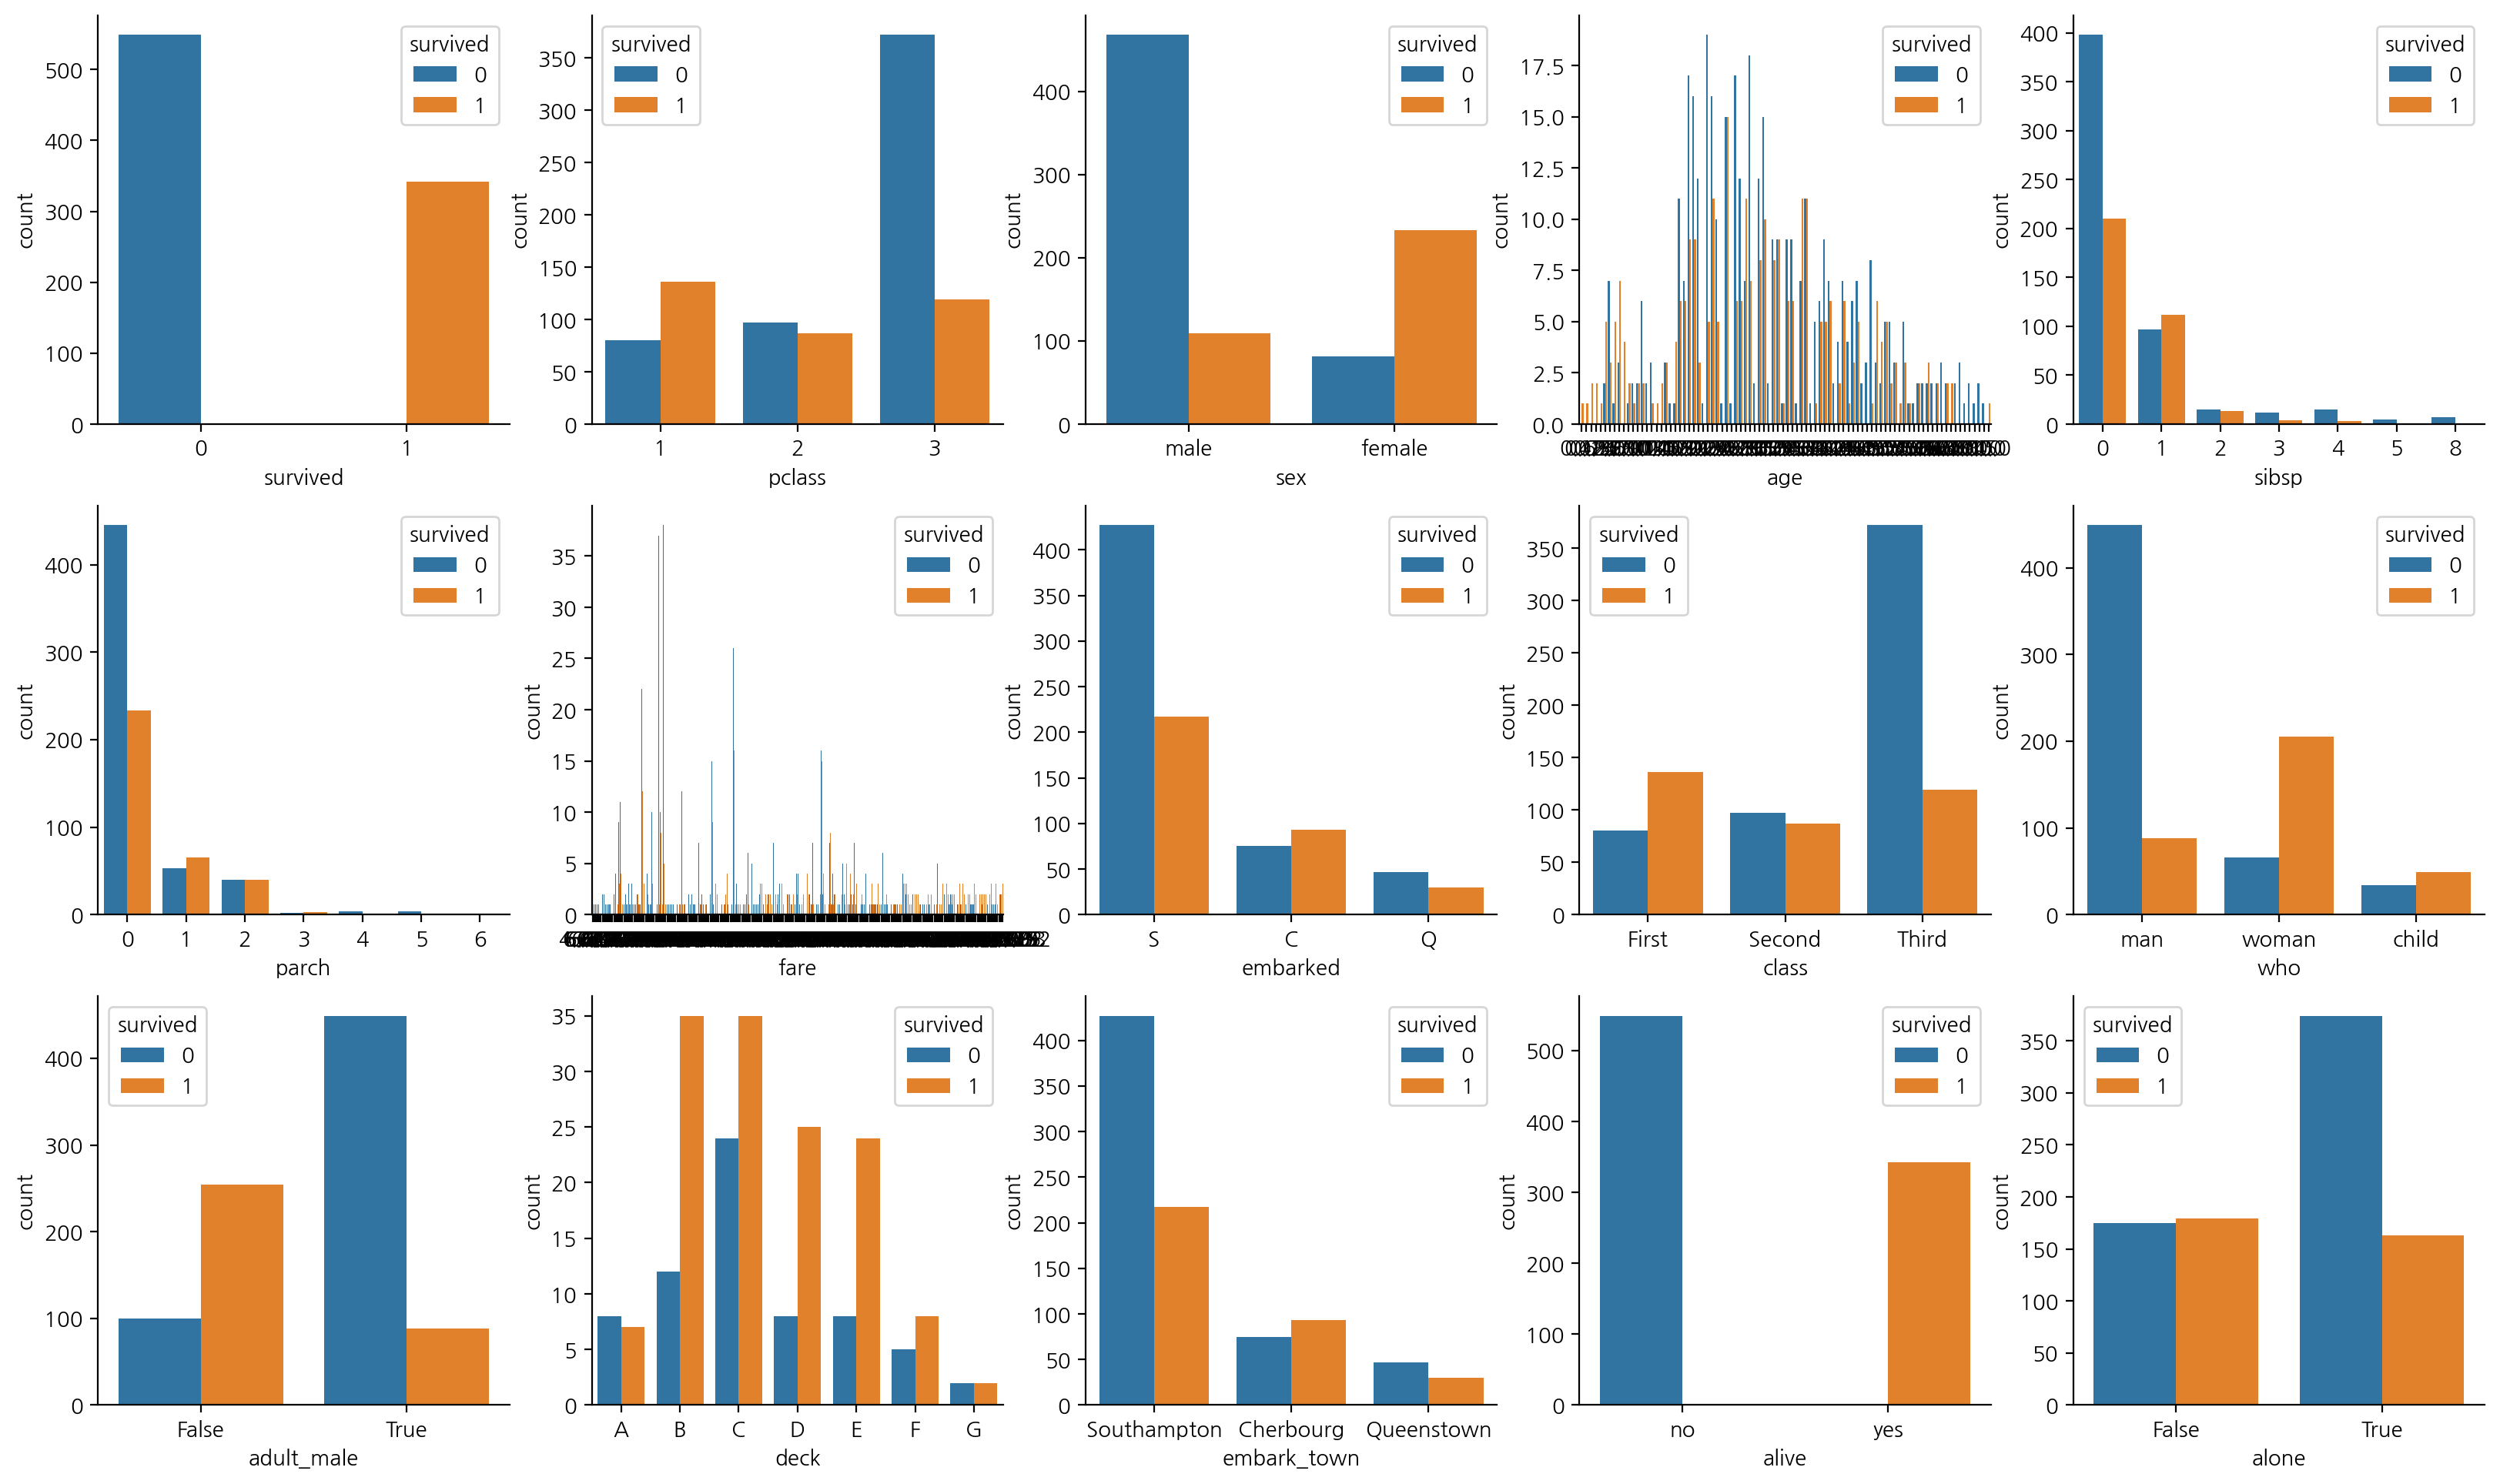

In [ ]:
# df['survived'] 타겟과 연관성이 있는 feature 찾기
# attribute 의 약자 -> attrs
attrs = df.columns

plt.figure(figsize=(20, 20), dpi=200)

# enumerate 함수를 사용하여 attrs의 인덱스와 값을 순차적으로 가져옴
for i, feature in enumerate(attrs) :
  plt.subplot(5,5, i+1 )
  sns.countplot(data=df, x = feature, hue = 'survived')

sns.despine() # 테두리 제거

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


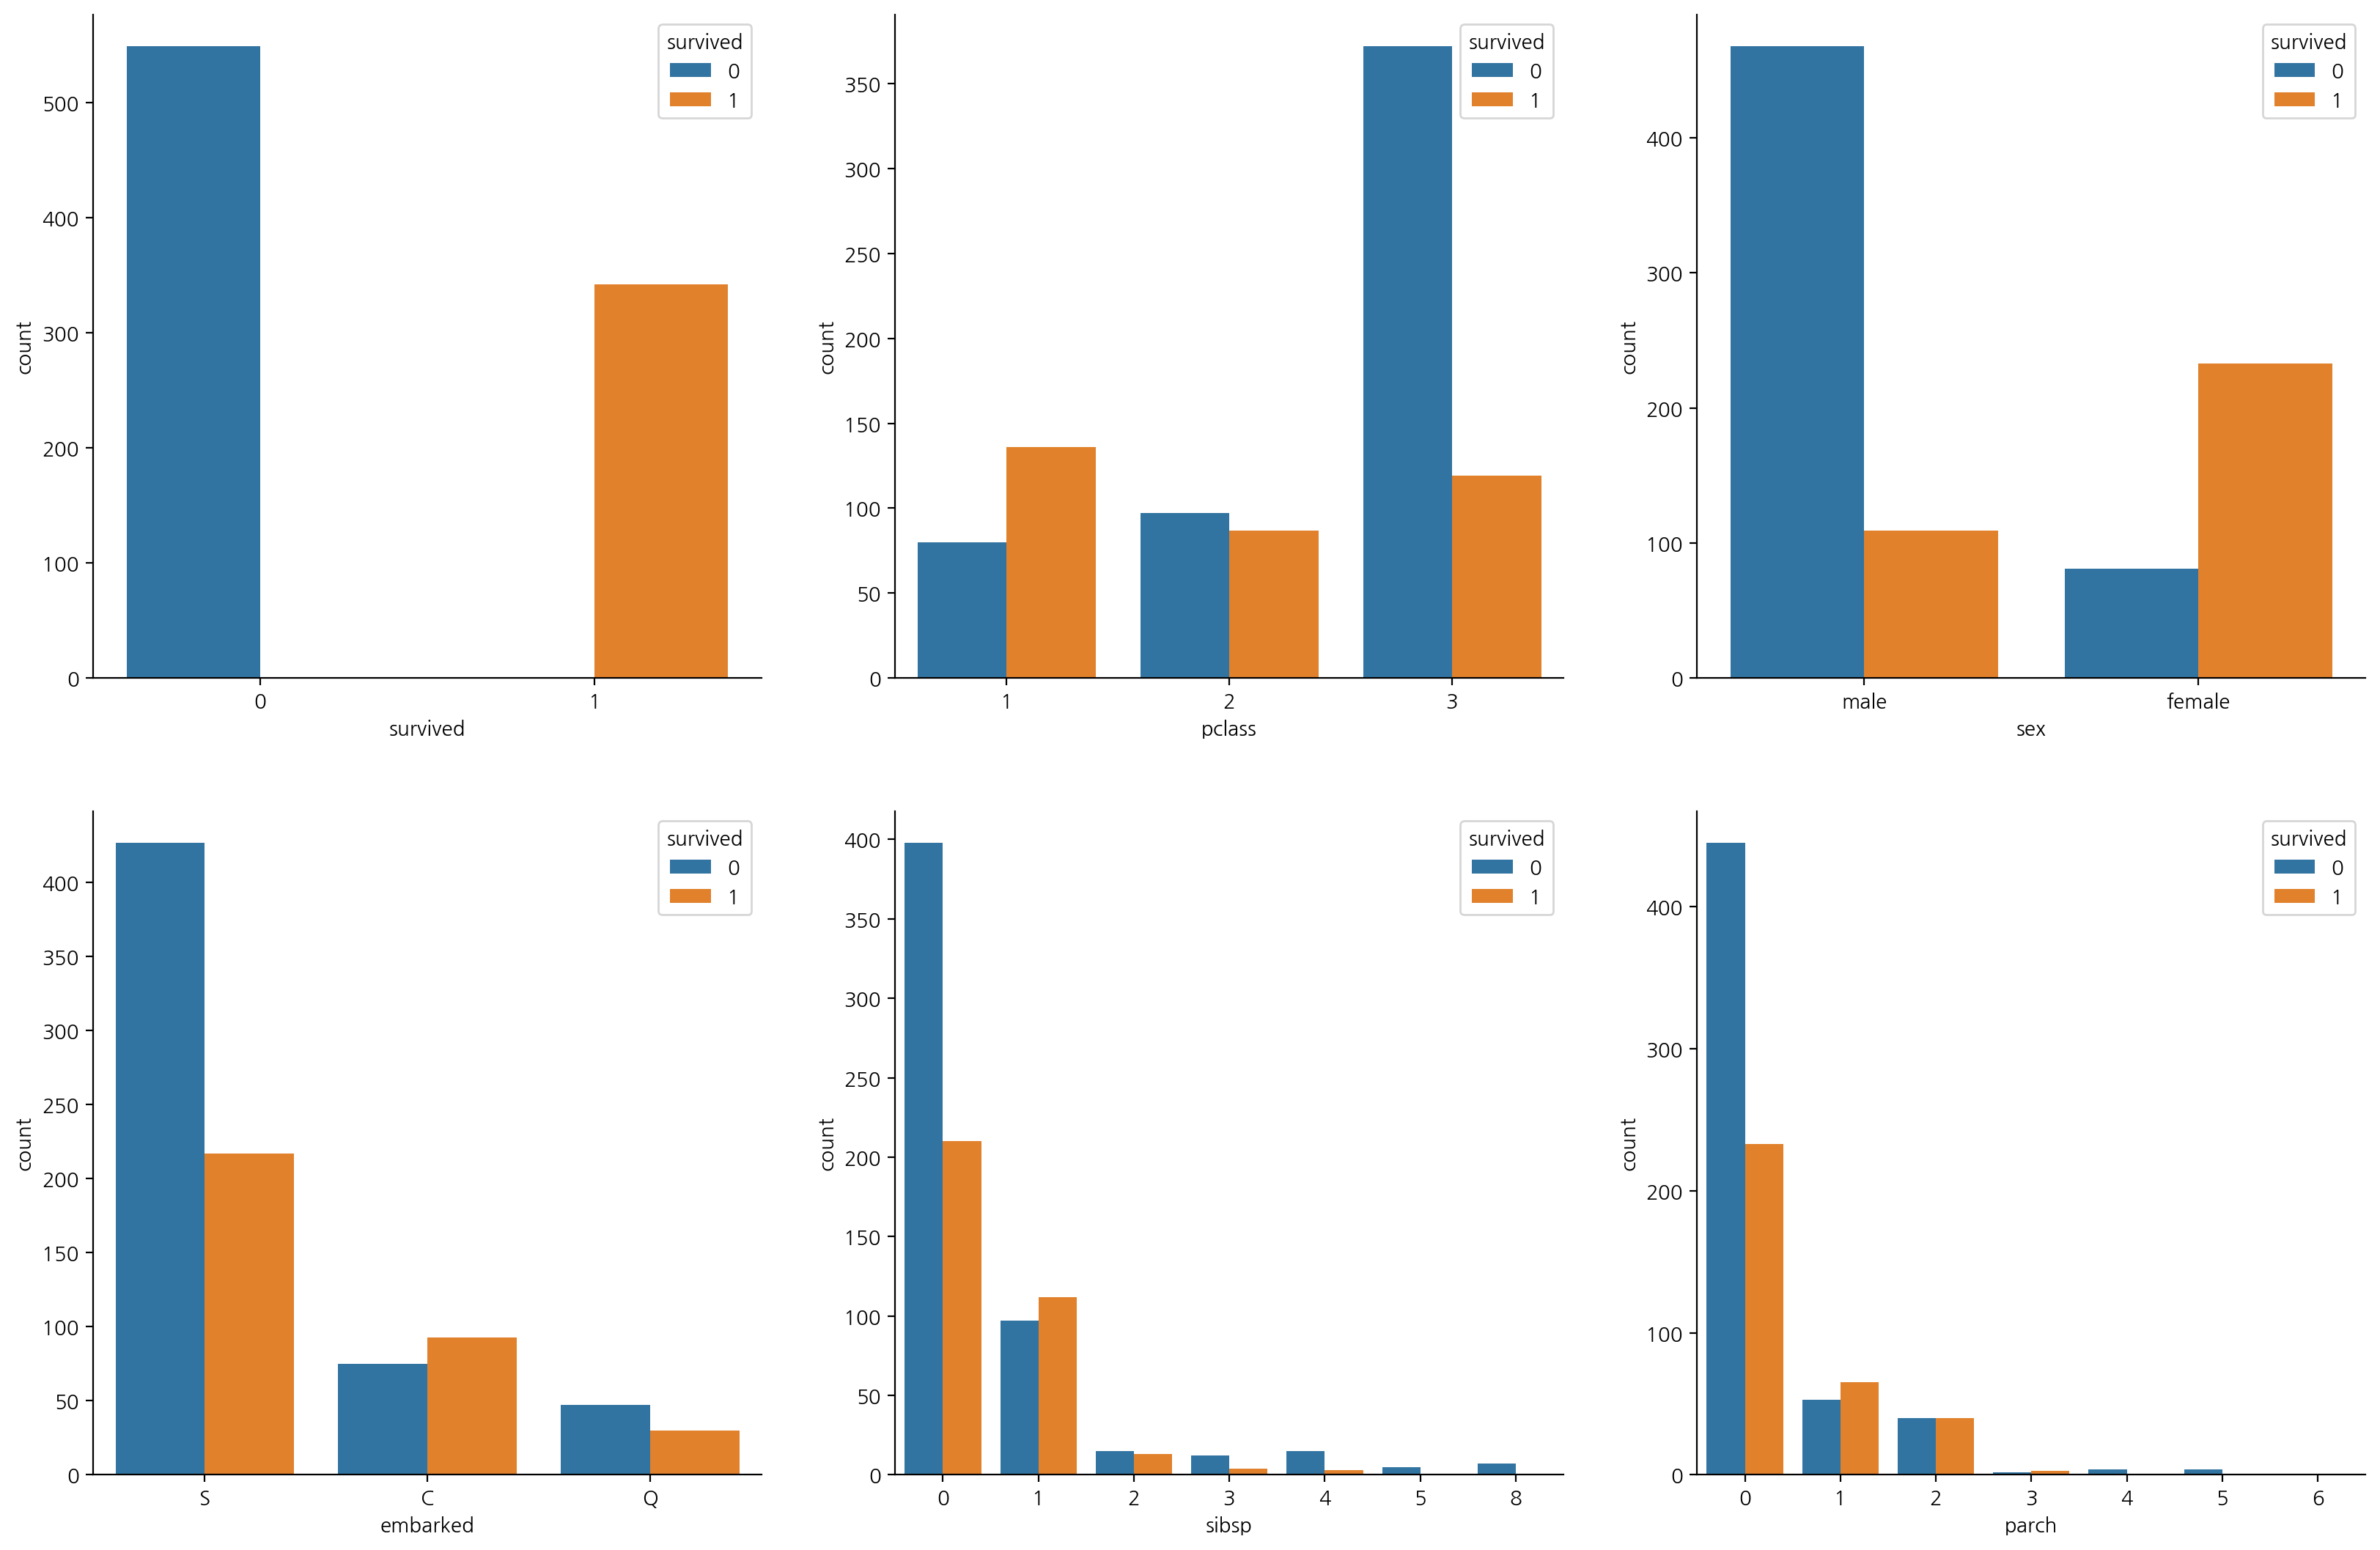

In [ ]:
# df['survived'] 타겟과 연관성이 있는 feature 찾기
# attribute 의 약자 -> attrs
attrs = ['survived', 'pclass', 'sex', 'embarked', 'sibsp', 'parch']

plt.figure(figsize=(20, 20), dpi=200)

for i, feature in enumerate(attrs) :
  plt.subplot(3,3, i+1 )
  sns.countplot(data=df, x = feature, hue = 'survived')

sns.despine() # 테두리 제거

## 데이터 전처리

#### 중복 칼럼 및 NaN 많은 칼럼 삭제

In [ ]:
df.isna().sum()

# deck(NaN 많음), embark_town(중복 칼럼) 칼럼 삭제

rdf = df.drop(['deck', 'embark_town'], axis = 1)
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         714 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    889 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    object  
 12  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.5+ KB


#### 나이(age) 칼럼의 NaN 데이터만 삭제

In [ ]:
rdf = rdf.dropna(subset = ['age'], how = 'any', axis=0)
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    714 non-null    int64   
 1   pclass      714 non-null    int64   
 2   sex         714 non-null    object  
 3   age         714 non-null    float64 
 4   sibsp       714 non-null    int64   
 5   parch       714 non-null    int64   
 6   fare        714 non-null    float64 
 7   embarked    712 non-null    object  
 8   class       714 non-null    category
 9   who         714 non-null    object  
 10  adult_male  714 non-null    bool    
 11  alive       714 non-null    object  
 12  alone       714 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 63.6+ KB


#### 승선도시(embarked) NaN 데이터 채우기

In [ ]:
# embarked 칼럼에 NaN 2건 -> 승선도시 중에 가장 많이 탑승한 도시로 채우기 (수치데이터 같은 경우에는 평균값으로 채우는 경우가 많음.)

# 1) 가장 많이 탑승한 승선도시 찾기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
most_freq # 가장 많이 탑승한 도시 출력 -> 'S'

# 2) NaN 데이터 패우기
rdf['embarked'].fillna(most_freq, inplace = True)

# 3) 데이터 확인
rdf.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

## 학습에 필요한 칼럼 정규화

#### feature 선택

In [ ]:
# 생존여부, 객실등급, 성별, 나이, 형제/자매수, 부모/자녀수, 탑승도시

ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

ndf

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
889,1,1,male,26.0,0,0,C


#### 문자로 되어 있는 feature incoding (인코딩) -> 원핫인코딩

In [ ]:
# 성별(sex), 승선도시 (embarked) 칼럼 인코딩
onehot_sex = pd.get_dummies(ndf['sex'])
onehot_embarked = pd.get_dummies(ndf['embarked'])

# 기존의 데이터프레임 합치기
ndf = pd.concat([ndf, onehot_sex], axis = 1)
ndf = pd.concat([ndf, onehot_embarked], axis = 1)

ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked,female,male,C,Q,S
0,0,3,male,22.0,1,0,S,0,1,0,0,1
1,1,1,female,38.0,1,0,C,1,0,1,0,0
2,1,3,female,26.0,0,0,S,1,0,0,0,1
3,1,1,female,35.0,1,0,S,1,0,0,0,1
4,0,3,male,35.0,0,0,S,0,1,0,0,1


In [ ]:
# 기존 칼럼 삭제하기

ndf.drop(['sex', 'embarked'], axis = 1, inplace=True) # 성별과 승선도시 기존 칼럼 삭제하기
ndf.head()

,survived,pclass,age,sibsp,parch,female,male,C,Q,S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


In [ ]:
# X, y로 데이터 분리
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'C', 'Q', 'S']]
y = ndf['survived']
X

,pclass,age,sibsp,parch,female,male,C,Q,S
0,3,22.0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0
2,3,26.0,0,0,1,0,0,0,1
3,1,35.0,1,0,1,0,0,0,1
4,3,35.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,1,0,0,1,0
886,2,27.0,0,0,0,1,0,0,1
887,1,19.0,0,0,1,0,0,0,1
889,1,26.0,0,0,0,1,1,0,0


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 714, dtype: int64

In [ ]:
# X(독립변수) 값을 정규화 -> 0~1값으로 줄여주는 작업 -> 스케일링(범위 조정)
# y 값은 정답이기 때문에 정규화 nope!!!!!!!!!!!!

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[ 0.91123237, -0.53037664,  0.52457013, ..., -0.47180795,
        -0.20203051,  0.53307848],
       [-1.47636364,  0.57183099,  0.52457013, ...,  2.11950647,
        -0.20203051, -1.87589641],
       [ 0.91123237, -0.25482473, -0.55170307, ..., -0.47180795,
        -0.20203051,  0.53307848],
       ...,
       [-1.47636364, -0.73704057, -0.55170307, ..., -0.47180795,
        -0.20203051,  0.53307848],
       [-1.47636364, -0.25482473, -0.55170307, ...,  2.11950647,
        -0.20203051, -1.87589641],
       [ 0.91123237,  0.15850313, -0.55170307, ..., -0.47180795,
         4.94974747, -1.87589641]])

In [ ]:
from sklearn.model_selection import train_test_split
# 성능 평가를 위한 데이터셋 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y, # 비율 보정 (타겟의 비율 보정) -> 한쪽으로 치우치면 안되니까 !
                                                    random_state = 7) # 75 : 25 비율로 나눔

In [ ]:
X_train.shape

(535, 9)

In [ ]:
X_test.shape

(179, 9)

## SVM 분류 모델 설정 및 학습

In [ ]:
from sklearn import svm

# 모델 객체 생성 kernel = 'rbf'
# 벡터 공간을 맵핑하는 함수 -> 선형(linear), 다항식(ploy), 가우시안 RBF(rbf), 시그모이드(sigmid)

# 서포트 벡터 머신(SVM)은 데이터를 분류하는 데 사용되는 머신러닝 알고리즘
# 이 코드에서는 RBF 커널을 사용하여 SVM 모델을 생성
# RBF 커널은 Radial Basis Function 커널의 약자로, 비선형 데이터를 분류하는데 적합
svm_model = svm.SVC(kernel='rbf').fit(X_train, y_train)

## SVM 분류 모델 성능평가

In [ ]:
print('훈련 데이터셋의 R2: ', svm_model.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', svm_model.score(X_test, y_test))

훈련 데이터셋의 R2:  0.8336448598130841
테스트 데이터셋의 R2:  0.8379888268156425


In [ ]:
from sklearn import metrics
y_pred = svm_model.predict(X_test)

print('accuracy : ' , metrics.accuracy_score(y_test, y_pred))
print('precision : ' , metrics.precision_score(y_test, y_pred))
print('recall : ' , metrics.recall_score(y_test, y_pred))
print('f1 : ' , metrics.f1_score(y_test, y_pred))

accuracy :  0.8379888268156425
precision :  0.8548387096774194
recall :  0.726027397260274
f1 :  0.7851851851851852


## 정규화 하지 않은 feature 성능평가

In [ ]:
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'C', 'Q', 'S']]
y = ndf['survived']

from sklearn.model_selection import train_test_split
# 성능 평가를 위한 데이터셋 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y, # 비율 보정 (타겟의 비율 보정) -> 한쪽으로 치우치면 안되니까 !
                                                    random_state = 7) # 75 : 25 비율로 나눔
svm_model = svm.SVC(kernel='rbf').fit(X_train, y_train)

print('훈련 데이터셋의 R2: ', svm_model.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', svm_model.score(X_test, y_test))


훈련 데이터셋의 R2:  0.6280373831775701
테스트 데이터셋의 R2:  0.6033519553072626


정규화 유무의 차이가 성능평가를 통해 알 수 있음

-> 데이터를 정규화한 경우가 더 좋은 결과가 나온다.

-> 모델의 성능은 데이터가 좌지우지 한다.